In [ ]:
### fig 또는 figure는 전체 그래프의 크기
## Axes : 그래프가 그려지는 Figure의 하위 섹션 -> title, X-Label, Y-Label을 제어
## Axis : Axes의 하위 요소로 그래프의 척도를 나타내는 순자 선 
#         - 2차원 그래프는 X와 Y Axis, 3차원 그래프는 X와 Y와 Z Axis를 가짐
## Label : figure의 다양한 요소의 이름
## Legend : Axes 안에 여러개의 그림이 있는 경우에 입력 값에 따라서 각각의 Label이 존재
## Title : 각 Axes에 주어진 이름, figure가 각각의 Title로 여러 개의 Axes를 가짐
#          Figure 또한 각각의 Title을 가짐
## Ticklabels : 각 'Axis(X,Y 또는 Z)'는 여러 개의 동일한 'Bin'으로 나눈 값의 범위
##             'Bin'은 두 가지 레벨에서 선택
## Spines : Figure의 가장자리를 의미함. 각각의 'Axes'에는 네 개의 Spines가 존재함
##          (Top, Bottom, Left, Right)
## Grid : 그래프의 다양한 점의 좌표를 쉽게 읽도록 영역을 Grid로 나눌 수 있음

# 참고 : https://matplotlib.org/stable/gallery/showcase/anatomy.html

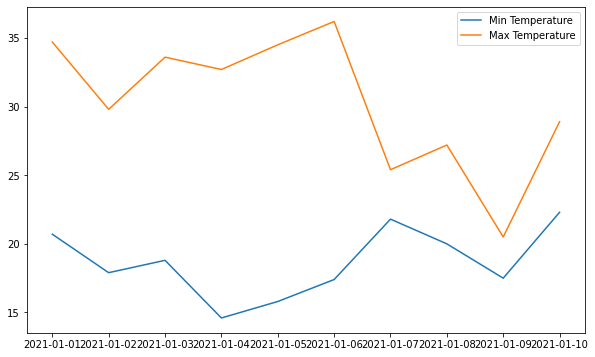

Figure(720x432)
AxesSubplot(0.125,0.125;0.775x0.755)


In [7]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01','2021-01-02','2021-01-03','2021-01-04','2021-01-05',
    '2021-01-06','2021-01-07','2021-01-08','2021-01-09','2021-01-10']

min_temp = [20.7, 17.9, 18.8, 14.6, 15.8, 17.4, 21.8, 20.0, 17.5, 22.3]
max_temp = [34.7, 29.8, 33.6, 32.7, 34.5, 36.2, 25.4, 27.2, 20.5, 28.9]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
axes.plot(dates, min_temp, label = 'Min Temperature')
axes.plot(dates, max_temp, label = 'Max Temperature')
axes.legend()
plt.show()
print(fig)
print(axes)

##### 예제 - 코로나 바이러스의 영향으로 중국인 관광객이 얼마나 줄었을까?

In [110]:
# 자료 : 외국인 출입국 통계 데이터 구하기 !
#       -> 한국관광공사에서 방한 외래관광객과 국민 해외관광객의 통계자료를 매월 발표중

# 다운받은 파일 읽어오기
import pandas as pd

kto_201901 = pd.read_excel('data/kto_201901.xlsx', header=1, usecols='A:G', skipfooter=4)
kto_201901.info()
kto_201901.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [111]:
### 데이터프레임을 값에 따라 필터링해보기 (0 값을 가진 경우)
# 필터 기준이 되는 Series 생성
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) | (kto_201901['공용'] == 0) | (kto_201901['유학/연수'] == 0)

# 필터 적용하여 출력
kto_201901[condition]

### 데이터 통합을 위해 기준연월 넣기
kto_201901['기준연월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [120]:
### 국적에서 중복데이터가 있는지 확인하기
kto_201901['국적'].unique()     # 컬럼 내의 데이터에 중복을 제거한 값들을 ndarray로 보여줌
continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']

# 제외국가리스트(continent_list)에 포함되지 않은 국가만 선택
condition = (kto_201901.국적.isin(continent_list) == False)
kto_201901_country = kto_201901[condition]

# 인덱스 재정렬 (필터링하면 데이터는 그대로 있고, 필터링한 내용만 출력함)
kto_201901_country_new = kto_201901_country.reset_index(drop=True)      # drop=True : 출력되지 않은 인덱스가 가리키는 데이터는 삭제해버리기~!
kto_201901_country_new.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [123]:
# 대륙 컬럼을 만들어서 넣기 - 아시아주, 미주, 구주, 대양주, 아프리카
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
kto_201901_country_new['대륙'] = continents
kto_201901_country_new.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [126]:
### 관광객비율(%) 컬럼 생성하기
kto_201901_country_new['관광객비율(%)'] = round(kto_201901_country_new['관광'] / kto_201901_country_new['계'] * 100, 1)
kto_201901_country_new.head()

# 관광객비율 기준 내림차순 정렬
kto_201901_country_new.sort_values('관광객비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [127]:
### 관광객 비율을 통해 피벗테이블 만들기 - 대륙별 관광객 비율의 평균
kto_201901_country_new.pivot_table(values='관광객비율(%)', index='대륙', aggfunc='mean')        # 대륙별 관광객비율의 평균

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [128]:
### 중국 국적 필터링
condition = (kto_201901_country_new['국적'] == '중국')
kto_201901_country_new[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [131]:
### 기준연월 별로 전체 외국인 관광객 대비 국적별 관광객 비율 확인

# 전체 외국인 관광객 수 구하기
tourist_sum = sum(kto_201901_country_new['관광'])

# 전체비율(%) 컬럼 생성
kto_201901_country_new['전체비율(%)'] = round(kto_201901_country_new['관광'] / tourist_sum * 100, 1)
kto_201901_country_new.head()

# 전체비율(%) 상위 5개국
kto_201901_country_new.sort_values('전체비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [ ]:
#### 데이터 전처리 과정을 함수로 작성하기
# 1. 불러올 데이터의 형태 파악
# 2. 엑셀 파일을 파이썬으로 불러오기
# 3. 데이터 탐색 (info(), describe())
# 4. 기준연월 컬럼 추가
# 5. 국적 데이터만 남기기(대륙별 중간소계 제거)
# 6. 대륙 컬럼 만들어 추가
# 7. 국적별 관광객비율(%) 컬럼 추가
# 8. 전체 외국인 관광객 대비 국적별 관광객 비율 - 전체비율(%) 컬럼 추가

In [132]:
#### 함수 만들어보기
## 인자 = 연, 월
## 함수 내부 : 1. 파일읽기 -> 2. 기준연월 컬럼 추가 -> 3. 국적 데이터만 남기기 -> 4. 대륙 컬럼 추가 -> 5. 국적별 관광객비율 추가 -> 6. 전체 대비 관광객 비율 추가

def create_kto_data(yyyy, mm) :
    # 1. 파일 읽기
    file_path = f'data/kto_{yyyy}{mm}.xlsx'
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 2. 기준연월 컬럼 추가
    df['기준연월'] = f'{yyyy}-{mm}'
    
    # 3. 국적 데이터만 남기기
    ignore_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    condition = (df['국적'].isin(ignore_list) == False)
    df_country = df[condition].reset_index(drop=True)
    
    # 4. 대륙 컬럼 추가
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    # 5. 국적별 관광객비율 추가
    df_country['관광객비율(%)'] = round(df_country['관광'] / df_country['계'] * 100, 1)
    
    # 6. 전체 대비 관광객 비율 추가
    tourist_sum = sum(df_country['계'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 7. 결과 반환
    return df_country

In [136]:
kto_test = create_kto_data('2014', '09')
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,186840,2476,216,629,6145,196306,2014-09,아시아,95.2,15.0
1,대만,52010,72,3,181,676,52942,2014-09,아시아,98.2,4.2
2,홍콩,39344,478,0,112,680,40614,2014-09,아시아,96.9,3.2
3,마카오,2807,16,0,12,28,2863,2014-09,아시아,98.0,0.2
4,태국,28105,62,325,94,4966,33552,2014-09,아시아,83.8,2.3


In [ ]:
## 반복문으로 처리하기


# 파일 추출을 위해 각 연도별로 기준연월 출력해보기
for y in range(2010, 2021) :
    for m in range(1, 13) :
        
        if y == 2020 and m > 5 : break;
        
        ## 조건문으로 기준연월 출력
        # if m < 10 : mm = f'0{m}'
        # else : mm = f'{m}'
        
        ## format 함수 이용해서 기준연월 출력
        # mm = '{:02}'.format(m)
        yymm = '{}{:02}'.format(y, m)
        print(yymm)  

        ## 자릿수 두개 중 부족한 부분은 0으로 채움
        # mm = str(m).zfill(2)    
        # print(f'{y}{mm}')

In [169]:
df = pd.DataFrame()     # 통합할 공간

for y in range(2010, 2021) :
    for m in range(1, 13) :
        
        try : tmp = create_kto_data(str(y), str(m).zfill(2))
        except FileNotFoundError : break
        
        df = pd.concat([df,tmp], ignore_index=True)


In [175]:
df.to_excel('data/kto_total.xlsx', index=False)

In [178]:
#### 국적별로 필터링된 데이터를 엑셀 파일로 저장하기

# 중국 국적의 파일을 필터링
condition = (df['국적'] == '중국')
df_filter_CN = df[condition]
df_filter_CN.to_excel('data/[국적별 관광객 데이터] 중국.xlsx', index=False)

In [180]:
country_list = df['국적'].unique()

for country in country_list :
    condition = (df['국적'] == country)
    df_filter = df[condition]
    df_filter.to_excel(f'data/[국적별 관광객 데이터] {country}.xlsx', index=False)